In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import random
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import semisup
from semisup.tools import material as dataset_tools
from augment import apply_augmentation
Dataset = tf.data.Dataset

NUM_LABELS = dataset_tools.NUM_LABELS
num_labels = NUM_LABELS
IMAGE_SHAPE = dataset_tools.IMAGE_SHAPE
image_shape = IMAGE_SHAPE

class_names = ['Cardboard', 'Pamphlet', 'Empty', 'Plastic Foil', 'Shredded Paper']
ONE_HOT_LABEL = False

/home/yanxiang.zyx/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yanxiang.zyx/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yanxiang.zyx/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yanxiang.zyx/.local/lib/python3.6/site-packages/tensorflow/python/f

In [2]:
train_images,test_images, train_labels, test_labels = dataset_tools.get_data(one_hot=False, test_size=0.2)

def aug(image, label):
    return apply_augmentation(image, target_shape=image_shape, params=dataset_tools.augmentation_params), label

def plot_images(images, labels):
    figsize=(15,15)
    plt.figure(figsize=figsize)
    display_num = 10
    for i in range(display_num):
        plt.subplot(10,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image = images[i].astype('uint8')
        plt.imshow(image, cmap=plt.cm.binary)
        class_label = np.argmax(labels[i]) if ONE_HOT_LABEL else labels[i]
        plt.xlabel(class_names[class_label])
    plt.show()

(227, 227, 3)
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


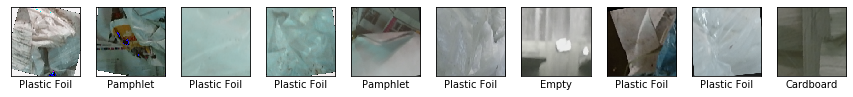

In [3]:
graph = tf.Graph()
with graph.as_default():
    t_images = tf.placeholder("float", shape=[None] + image_shape)
    t_labels = tf.placeholder(train_labels.dtype, shape=[None])
    dataset = Dataset.from_tensor_slices((t_images, t_labels))
    dataset = dataset.map(aug)
    dataset = dataset.repeat().batch(5 * NUM_LABELS)
    iterator = dataset.make_initializable_iterator()
    t_sup_images, t_sup_labels = iterator.get_next()

with tf.Session(graph=graph) as sess:
    tf.global_variables_initializer().run()
    sess.run(iterator.initializer, feed_dict={t_images: train_images, t_labels: train_labels})
    sup_images, sup_labels = sess.run([t_sup_images,t_sup_labels])
    plot_images(sup_images, sup_labels)


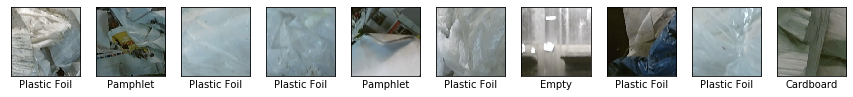

In [4]:
plot_images(train_images, train_labels)

In [8]:
print(train_labels.dtype)

uint8
